In [ ]:
# Performance Measure of classifier  on Imbalanced dataset##

In [1]:
import warnings
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
#ignore warnings
warnings.filterwarnings('ignore')
# Load digits dataset


df = pd.read_csv('creditcard.csv\creditcard.csv')
df

,0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,...,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,0.1
0,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
2,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
3,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
4,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284802,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284803,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284804,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284806 entries, 0 to 284805
Data columns (total 31 columns):
0                      284806 non-null float64
-1.3598071336738       284806 non-null float64
-0.0727811733098497    284806 non-null float64
2.53634673796914       284806 non-null float64
1.37815522427443       284806 non-null float64
-0.338320769942518     284806 non-null float64
0.462387777762292      284806 non-null float64
0.239598554061257      284806 non-null float64
0.0986979012610507     284806 non-null float64
0.363786969611213      284806 non-null float64
0.0907941719789316     284806 non-null float64
-0.551599533260813     284806 non-null float64
-0.617800855762348     284806 non-null float64
-0.991389847235408     284806 non-null float64
-0.311169353699879     284806 non-null float64
1.46817697209427       284806 non-null float64
-0.470400525259478     284806 non-null float64
0.207971241929242      284806 non-null float64
0.0257905801985591     284806 non-null floa

In [4]:
# df = df.values
X = df.iloc[:,0:30]
y = df.iloc[:,30]
#test size
test_size = 0.33
#generate the same set of random numbers
seed = 42

In [5]:
#Split data into train and test set. 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

In [6]:
#Train Model
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [7]:
#Construct the Confusion Matrix
labels = [0, 1]
cm = confusion_matrix(y_test, pred, labels)
print(cm)

[[93786    43]
 [   60    97]]


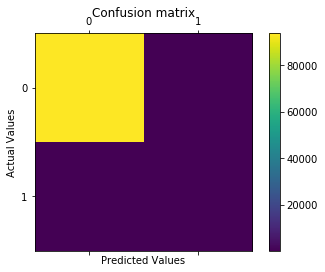

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# To compute the accuracy on classification task

In [9]:
#cross-validation settings
kfold = model_selection.KFold(n_splits=10, random_state=seed)
#Model instance
model = LogisticRegression()
#Evaluate model performance
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print('Accuracy -val set: %.2f%% (%.2f)' % (results.mean()*100, results.std()))

#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
#fit model
model.fit(X_train, y_train)
#accuracy on test set
result = model.score(X_test, y_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

Accuracy -val set: 99.66% (0.01)
Accuracy - test set: 99.89%


# Computation of Precision

In [10]:
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score

In [11]:
precision = precision_score(y_test, pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred)
print('Recall: %f' % recall)
# f1: tp / (tp + fp + fn)
f1 = f1_score(y_test, pred)
print('F1 score: %f' % f1)

Precision: 0.692857
Recall: 0.617834
F1 score: 0.653199


# ROC curves

In [12]:
from sklearn.metrics import roc_auc_score, roc_curve

In [13]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]


In [14]:
auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

AUC - Test Set: 91.11%


In [15]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

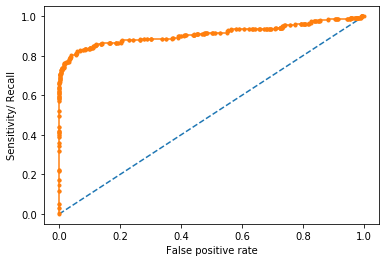

In [16]:
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()

# Log Loss

Log Loss is a slight twist on something called the Likelihood Function. In fact, Log Loss is -1 * the log of the likelihood function. So, we will start by understanding the likelihood function.
-  A perfect model would have a log loss of 0.
-  It is a measure of uncertainty (you may call it entropy), so a low Log Loss means a low uncertainty/entropy of your model.
-  Log Loss is similar to the Accuracy, but it will favor models that distinguish more strongly the classes.

In [17]:
from sklearn.metrics import log_loss

In [18]:
accuracy = log_loss(y_test, pred)
print("Logloss: %.2f" % (accuracy))

Logloss: 0.04
